In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import load_model
import os
import numpy as np

%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display

from io import BytesIO
from PIL import Image
from PIL import ImageOps


Using TensorFlow backend.


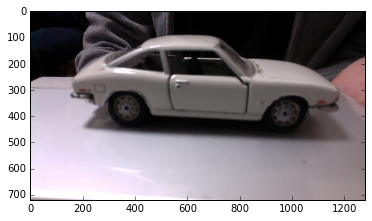

In [5]:
vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

# Push ■ Button!!
while is_capturing:
    try:    # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        webcam_preview.set_data(frame)
        plt.draw()
 
        display.clear_output(wait=True)
        display.display(plt.gcf())

        plt.pause(0.1)    # the pause time is = 1 / frameratef
    except KeyboardInterrupt:
        vc.release()
        is_capturing = False


In [6]:
print(type(frame))
print(frame.shape)

<class 'numpy.ndarray'>
(720, 1280, 3)


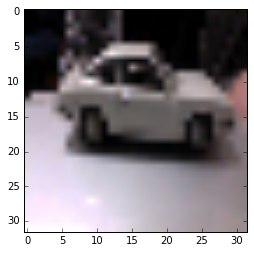

In [7]:
# resize cifar10 image size(32, 32)
image = Image.fromarray(np.uint8(frame))
image = image.resize((32, 32))

resize_frame = np.asarray(image)
plt.imshow(resize_frame)
plt.show()

In [8]:
# cifar10 category label name
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

In [9]:
'''
LOAD MODEL
'''

# use ResNet
model = load_model('cifar10_ResNet20v1_model.092.h5')

# use CNN
# model = load_model('keras_cifar10_trained_model.h5')


I think...
----------------------------------------------
[airplane] : 0.0%
[automobile] : 99.99%
[bird] : 0.0%
[cat] : 0.0%
[deer] : 0.0%
[dog] : 0.0%
[frog] : 0.0%
[horse] : 0.0%
[ship] : 0.01%
[truck] : 0.0%
----------------------------------------------


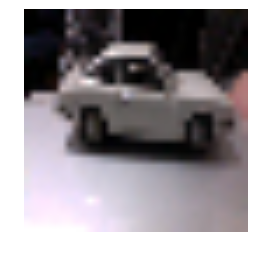

probability : 99.99%
I think this is a [automobile].


In [10]:
'''
PREDICTING
'''

def convertCIFER10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c


data = convertCIFER10Data(resize_frame)

plt.imshow(resize_frame)
plt.axis('off')

ret = model.predict(data, batch_size=1) 
#print(ret)
print("I think...")
print("----------------------------------------------")
bestnum = 0.0
bestclass = 0
for n in [0,1,2,3,4,5,6,7,8,9]:
    print("[{}] : {}%".format(cifar10_labels[n], round(ret[0][n]*100,2)))
    if bestnum < ret[0][n]:
        bestnum = ret[0][n]
        bestclass = n
        
print("----------------------------------------------")
                                                                   
plt.show()
print("probability : {}%".format( round(bestnum*100,2) ))
print("I think this is a [{}].".format(cifar10_labels[bestclass]))
